# Assignment 4

## Feature Selection

##### You need to load the UCI Arrhythmia dataset https://archive.ics.uci.edu/ml/datasets/arrhythmia

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import requests
from io import BytesIO
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data'
s = requests.get(url).content
df = pd.read_csv(BytesIO(s), header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [4]:
df.select_dtypes(include=['object'])

,10,11,12,13,14
0,13,64,-2,?,63
1,37,-17,31,?,53
2,34,70,66,23,75
3,11,-5,20,?,71
4,13,61,3,?,?
...,...,...,...,...,...
447,4,40,-27,?,63
448,66,52,79,?,73
449,-19,-61,-70,84,84
450,29,-22,43,103,80


In [5]:
df = df.replace('?', np.nan)
df[10].fillna(df[10].mode()[0], inplace=True) 
df[11].fillna(df[11].mode()[0], inplace=True) 
df[12].fillna(df[12].mode()[0], inplace=True) 
df[13].fillna(df[13].mode()[0], inplace=True) 
df[14].fillna(df[14].mode()[0], inplace=True) 
df = df.astype(int)

In [6]:
X = df.iloc[:, :279]
y = df[279]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5575221238938053

### Run three different types of feature selection methods (Univariate Statistics, model based, and Iterative Feature Selection). You need to run the methods for number_of_features= 20, 50, 100, 150, 200

#### Univariate Statistics

In [8]:
# Running Univariate Statistics and decreasing the number of features to 20
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=7)
select.fit(X_train, y_train)

X_train_selected20 = select.transform(X_train)
X_test_selected = select.transform(X_test)

knn.fit(X_train_selected20, y_train)
univariate_20 = knn.score(X_test_selected, y_test)
print('Test Score of the model with 20 features is {:.3f}.'.format(univariate_20))

Test Score of the model with 20 features is 0.611.


C:\Users\Melis\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 19  24  67  69  72  83  86 129 131 132 139 141 143 145 151 154 156 157
 163 164 194 204 244 254 264 273 274] are constant.
  UserWarning)
C:\Users\Melis\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [9]:
# Running Univariate Statistics and decreasing the number of features to 50
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=17.7)
select.fit(X_train, y_train)
X_train_selected50 = select.transform(X_train)
X_test_selected = select.transform(X_test)

knn.fit(X_train_selected50, y_train)
univariate_50 = knn.score(X_test_selected, y_test)
print('Test Score of the model with 50 features is {:.3f}.'.format(univariate_50))

Test Score of the model with 50 features is 0.584.


C:\Users\Melis\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 19  24  67  69  72  83  86 129 131 132 139 141 143 145 151 154 156 157
 163 164 194 204 244 254 264 273 274] are constant.
  UserWarning)
C:\Users\Melis\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [10]:
# Running Univariate Statistics and decreasing the number of features to 100
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=35.8)
select.fit(X_train, y_train)
X_train_selected100 = select.transform(X_train)
X_test_selected = select.transform(X_test)

knn.fit(X_train_selected100, y_train)
univariate_100 = knn.score(X_test_selected, y_test)
print('Test Score of the model with 100 features is {:.3f}.'.format(univariate_100))

Test Score of the model with 100 features is 0.602.


C:\Users\Melis\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 19  24  67  69  72  83  86 129 131 132 139 141 143 145 151 154 156 157
 163 164 194 204 244 254 264 273 274] are constant.
  UserWarning)
C:\Users\Melis\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [11]:
# Running Univariate Statistics and decreasing the number of features to 150
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=53.7)
select.fit(X_train, y_train)
X_train_selected150 = select.transform(X_train)
X_test_selected = select.transform(X_test)

knn.fit(X_train_selected150, y_train)
univariate_150 = knn.score(X_test_selected, y_test)
print('Test Score of the model with 150 features is {:.3f}.'.format(univariate_150))

Test Score of the model with 150 features is 0.593.


C:\Users\Melis\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 19  24  67  69  72  83  86 129 131 132 139 141 143 145 151 154 156 157
 163 164 194 204 244 254 264 273 274] are constant.
  UserWarning)
C:\Users\Melis\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [12]:
# Running Univariate Statistics and decreasing the number of features to 200
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=71.8)
select.fit(X_train, y_train)
X_train_selected200 = select.transform(X_train)
X_test_selected = select.transform(X_test)

knn.fit(X_train_selected200, y_train)
univariate_200 = knn.score(X_test_selected, y_test)
print('Test Score of the model with 200 features is {:.3f}.'.format(univariate_200))

Test Score of the model with 200 features is 0.549.


C:\Users\Melis\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 19  24  67  69  72  83  86 129 131 132 139 141 143 145 151 154 156 157
 163 164 194 204 244 254 264 273 274] are constant.
  UserWarning)
C:\Users\Melis\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


#### Model Based Feature Selection

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
select = SelectFromModel(
RandomForestClassifier(n_estimators=100, random_state=42),
threshold="median", max_features=20)

In [14]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (339, 279)
X_train_l1.shape: (339, 20)


In [15]:
X_test_l1 = select.transform(X_test)
model_20 = model.fit(X_train_l1, y_train).score(X_test_l1, y_test)
print('Test Score of the model with 20 features is {:.3f}.'.format(model_20))

Test Score of the model with 20 features is 0.690.


In [16]:
select = SelectFromModel(
RandomForestClassifier(n_estimators=100, random_state=42),
threshold="median", max_features=50)
select.fit(X_train, y_train)
X_train_l2 = select.transform(X_train)
X_test_l2 = select.transform(X_test)
model_50 = model.fit(X_train_l2, y_train).score(X_test_l2, y_test)
print('Test Score of the model with 50 features is {:.3f}.'.format(model_50))

Test Score of the model with 50 features is 0.708.


In [17]:
select = SelectFromModel(
RandomForestClassifier(n_estimators=100, random_state=42),
threshold="median", max_features=100)
select.fit(X_train, y_train)
X_train_l3 = select.transform(X_train)
X_test_l3 = select.transform(X_test)
model_100 = model.fit(X_train_l3, y_train).score(X_test_l3, y_test)
print('Test Score of the model with 100 features is {:.3f}.'.format(model_100))

Test Score of the model with 100 features is 0.699.


In [18]:
select = SelectFromModel(
RandomForestClassifier(n_estimators=100, random_state=42),
threshold="median", max_features=150)
select.fit(X_train, y_train)
X_train_l4 = select.transform(X_train)
X_test_l4 = select.transform(X_test)
model_150 = model.fit(X_train_l4, y_train).score(X_test_l4, y_test)
print('Test Score of the model with 150 features is {:.3f}.'.format(model_150))

Test Score of the model with 150 features is 0.699.


In [19]:
select = SelectFromModel(
RandomForestClassifier(n_estimators=100, random_state=42),
threshold="median", max_features=200)
select.fit(X_train, y_train)
X_train_l4 = select.transform(X_train)
X_test_l4 = select.transform(X_test)
model_200 = model.fit(X_train_l4, y_train).score(X_test_l4, y_test)
print('Test Score of the model with 200 features is {:.3f}.'.format(model_200))

Test Score of the model with 200 features is 0.699.


#### Iterative Feature Selection

Text(0.5, 0, 'Sample index')

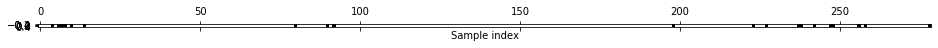

In [20]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
n_features_to_select=20)
select.fit(X_train, y_train)

# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [21]:
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
rfe_20 = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('Test Score of the model with 20 features is {:.3f}.'.format(rfe_20))

Test Score of the model with 20 features is 0.699.


In [22]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
n_features_to_select=50)
select.fit(X_train, y_train)
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
rfe_50 = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('Test Score of the model with 50 features is {:.3f}.'.format(rfe_50))

Test Score of the model with 50 features is 0.690.


In [23]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
n_features_to_select=100)
select.fit(X_train, y_train)
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
rfe_100 = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('Test Score of the model with 100 features is {:.3f}.'.format(rfe_100))

Test Score of the model with 100 features is 0.726.


In [24]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
n_features_to_select=150)
select.fit(X_train, y_train)
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
rfe_150 = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('Test Score of the model with 150 features is {:.3f}.'.format(rfe_150))

Test Score of the model with 150 features is 0.726.


In [25]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
n_features_to_select=200)
select.fit(X_train, y_train)
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
rfe_200 = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('Test Score of the model with 200 features is {:.3f}.'.format(rfe_200))

Test Score of the model with 200 features is 0.699.


#### All the results should show in the same figure (At the end we have just one figure)

In [26]:
rfe = [rfe_20, rfe_50, rfe_100, rfe_150, rfe_200]
model_based = [model_20, model_50, model_100, model_150, model_200]
univariate = [univariate_20, univariate_50, univariate_100, univariate_150, univariate_200]
x_axis = [20, 50, 100, 150, 200]

Text(0.5, 1.0, 'Change of Test Score by Number of Feature for each Feature Selection Method')

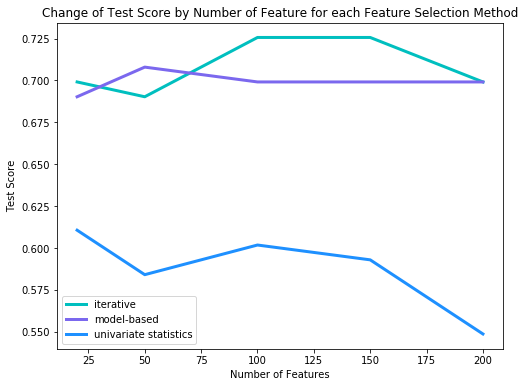

In [27]:
plt.figure(figsize=(8, 6))
sns.lineplot(x_axis, rfe, color = 'c', linewidth = 3)
sns.lineplot(x_axis, model_based, color = 'mediumslateblue', linewidth = 3)
sns.lineplot(x_axis, univariate, color = 'dodgerblue', linewidth = 3)
plt.legend(labels=["iterative","model-based", "univariate statistics"])
plt.xlabel('Number of Features')
plt.ylabel('Test Score')
plt.title('Change of Test Score by Number of Feature for each Feature Selection Method')